1) The main purpose is more comfortable visualization that can be fitted in 2-3 dimentional space
   Also there are much more drawbacks such as: losing a lot of information apllying dim reduction, losing time doing    this operation.
2) It is such an issue that can arise while you operate in high-dimensional spaces. More precisely: the bigger dimension the more distance between points in this dimension. It causes sparse models that take a lot of time to operate them

3) There is a reverse operation as well. We can return to a higher dimensional basis and cast the data onto it but we get slightly different data

4) Kernel PCA

5) It depends on how much sparsed our data

6) If we have enough Ram and Computational resources we would use a vanilla PCA, if we don't have such then we use incremental or kernel PCA.If we face nonlinear data we should use a kernel PCA

7) Explained variance  (Reconstruction error)

8) It can absolutely make sense to chain two different dimensionality
reduction algorithms. A common example is using PCA to quickly get
rid of a large number of useless dimensions, then applying another
much slower dimensionality reduction algorithm, such as LLE. This
two-step approach will likely yield the same performance as using LLE
only, but in a fraction of the time.



In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test = train_test_split(mnist.data[:30000], mnist.target[:30000], test_size=0.2)


In [23]:
%%time
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

CPU times: user 22.7 s, sys: 36.1 ms, total: 22.7 s
Wall time: 22.8 s


0.9603333333333334

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)


In [28]:
%%time

rfc = RandomForestClassifier()
rfc.fit(X_train_reduced, y_train)
rfc.score(X_test_reduced, y_test)

CPU times: user 50.2 s, sys: 12.4 ms, total: 50.2 s
Wall time: 50.3 s


0.9375

In [ ]:
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

colors = [
    '#000000',
    '#ff0000',
    '#ff9d00',
    '#ffcc00',
    '#aaff00',
    '#2ba100',
    '#00947b',
    '#00328f',
    '#53008f',
    '#78026c'
]

# dim = TSNE(n_components=2)
# dim = PCA(n_components=2)
dim = MDS(n_components=2)

X_tsne = dim.fit_transform(X_test)


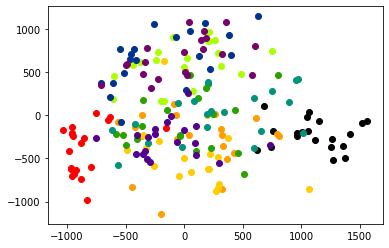

In [75]:
y_test = y_test.set_axis(range(6000))
for i in range(10):
    idx = y_test[y_test==str(i)][:20]
    plt.scatter(X_tsne[idx.index,0],X_tsne[idx.index,1],color=colors[i])



